ICESat-2 orientation can be: backward, forward, and transition. During transition, ICESat-2 is maneuvering between the two orientations. Science quality is potentially degraded while in transition mode. (Source: https://nsidc.org/sites/nsidc.org/files/technical-references/ICESat2_ATL03_data_dict_v005.pdf)


The parameter "/orbit_info/sc_orient" in ATL03 denotes the orientation of ICESat-2.

0 = backward

1 = forward

2 = transition

In [73]:
import h5py
import pandas as pd

User input: "strong" or "weak"

In [88]:
def which_beam(f, sc_orient, beam='both'):
    if beam=='both':
        # extracted_beam = 
        print("Subset both beams")
    elif beam=='strong':
        extracted_beam = get_strong_beams(f, sc_orient)
    elif beam=='weak':
        extracted_beam = get_weak_beams(f, sc_orient)
    else:
        print('Input should be one of the following: "both", "strong" or "weak"')
    return extracted_beam

Script reads the variable "/orbit_info/sc_orient" to determine orientation.

In [75]:
# If input = "strong":
#     If sc_orient = 0:
#         subset gt1l, gt2l, gt3l
#     elif sc_orient = 1:
#         subset gt1r, gt2r, gt3r
#     else:
#         print("Error: transition phase"), or other output?

In [76]:
def get_strong_beams(f, sc_orient):
    if sc_orient == 0:
        # subset gt1l, gt2l, gt3l
        track = 'gt3l' # or 'gt1l', 'gt2l'
        strong = pd.DataFrame(data={'lat': f[track + '/sea_ice_segments/latitude'][:],
                                  'lon': f[track + '/sea_ice_segments/longitude'][:],
                                  'elev': f[track + '/sea_ice_segments/heights/height_segment_height'][:]
                                 }
                           )
    elif sc_orient == 1:
        # subset gt1r, gt2r, gt3r
        track = 'gt3r' # or 'gt1r', 'gt2r'
        strong = pd.DataFrame(data={'lat': f[track + '/sea_ice_segments/latitude'][:],
                                  'lon': f[track + '/sea_ice_segments/longitude'][:],
                                  'elev': f[track + '/sea_ice_segments/heights/height_segment_height'][:]
                                 }
                           )
    else:
        print("Error: transition phase") # or other output?
        strong = pd.DataFrame()
    return strong

In [77]:
# If input = "weak":
#     If sc_orient = 0:
#         subset gt1r, gt2r, gt3r
#     elif sc_orient = 1:
#         subset gt1l, gt2l, gt3l
#     else:
#         print("Error: transition phase"), or other output?

In [87]:
def get_weak_beams(f, sc_orient):
    if sc_orient == 0:
        # subset gt1r, gt2r, gt3r
        track = 'gt3r' # or 'gt1r', 'gt2r'
        weak = pd.DataFrame(data={'lat': f[track + '/sea_ice_segments/latitude'][:],
                                  'lon': f[track + '/sea_ice_segments/longitude'][:],
                                  'elev': f[track + '/sea_ice_segments/heights/height_segment_height'][:]
                                 }
                           )
    elif sc_orient == 1:
        # subset gt1l, gt2l, gt3l
        track = 'gt3l' # or 'gt1l', 'gt2l'
        weak = pd.DataFrame(data={'lat': f[track + '/sea_ice_segments/latitude'][:],
                                  'lon': f[track + '/sea_ice_segments/longitude'][:],
                                  'elev': f[track + '/sea_ice_segments/heights/height_segment_height'][:]
                                 }
                           )
    else:
        print("Error: transition phase") # or other output?
        weak = pd.DataFrame()
    return weak

Sample data to demonstrate idea (Attached in GitHub repo)

In [79]:
is2_file = 'processed_ATL07-01_20210223050453_09351001_005_01.h5'
with h5py.File(is2_file, 'r') as f:
    is2_gt3r = pd.DataFrame(data={'lat': f['gt3r/sea_ice_segments/latitude'][:],
                                  'lon': f['gt3r/sea_ice_segments/longitude'][:],
                                  'elev': f['gt3r/sea_ice_segments/heights/height_segment_height'][:]
                                 }
                           ) 
    is2_gt3l = pd.DataFrame(data={'lat': f['gt3l/sea_ice_segments/latitude'][:],
                                  'lon': f['gt3l/sea_ice_segments/longitude'][:],
                                  'elev': f['gt3l/sea_ice_segments/heights/height_segment_height'][:]
                                 }
                           ) 
    # orient = pd.DataFrame(data={'lat': f['gt3r/sea_ice_segments/latitude'][:],
    #                             'lon': f['gt3r/sea_ice_segments/longitude'][:],
    #                             'orient': f['orbit_info/sc_orient'][:]
    #                            }
    #                      )

Read in the sample ATL07 data

In [80]:
is2_file = 'processed_ATL07-01_20210223050453_09351001_005_01.h5'
f = h5py.File(is2_file, 'r')

This sample data I am using only contains gt3l and gt3r

In [81]:
list(f.keys())

['METADATA', 'ancillary_data', 'gt3l', 'gt3r', 'orbit_info']

Check the value of sc_orient

In [82]:
orient = f['orbit_info/sc_orient'][:]
orient

array([1], dtype=int8)

Extract the strong beam only from the sample ATL07 data

In [83]:
which_beam(f, orient, 'strong')

,lat,lon,elev
0,68.232699,-109.948477,3.402823e+38
1,68.232699,-109.948477,3.402823e+38
2,68.232699,-109.948477,3.402823e+38
3,68.232699,-109.948477,3.402823e+38
4,68.232699,-109.948477,3.402823e+38
...,...,...,...
2023,68.393208,-109.999914,8.459367e-02
2024,68.393277,-109.999936,1.203090e-01
2025,68.393331,-109.999953,2.008147e-01
2026,68.393381,-109.999969,2.659971e-01


In [84]:
# When orient==1, ICESat-2 is forward and the Right beams are strong
# Check if gt3r is the output of which_beam(f,orient,'strong')
is2_gt3r

,lat,lon,elev
0,68.232699,-109.948477,3.402823e+38
1,68.232699,-109.948477,3.402823e+38
2,68.232699,-109.948477,3.402823e+38
3,68.232699,-109.948477,3.402823e+38
4,68.232699,-109.948477,3.402823e+38
...,...,...,...
2023,68.393208,-109.999914,8.459367e-02
2024,68.393277,-109.999936,1.203090e-01
2025,68.393331,-109.999953,2.008147e-01
2026,68.393381,-109.999969,2.659971e-01


Extract the weak beam only

In [89]:
which_beam(f, orient, 'weak')

,lat,lon,elev
0,68.233393,-109.950679,0.199710
1,68.233393,-109.950679,0.199710
2,68.233393,-109.950679,0.199898
3,68.233393,-109.950679,0.199710
4,68.233393,-109.950679,0.199710
...,...,...,...
1912,68.387299,-109.999908,0.009291
1913,68.387356,-109.999927,0.019338
1914,68.387408,-109.999944,0.033115
1915,68.387487,-109.999971,0.051873


Plotting strong and weak beams to compare


<AxesSubplot:>

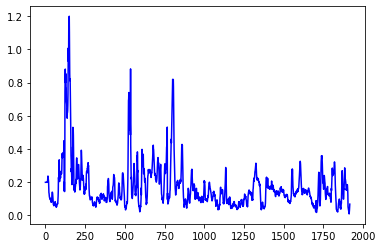

In [94]:
which_beam(f, orient, 'weak')['elev'].plot(color='blue')

<AxesSubplot:>

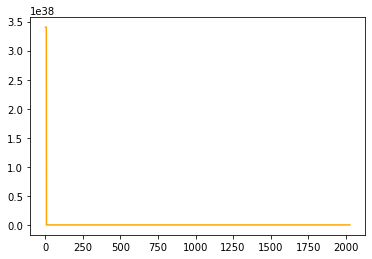

In [93]:
which_beam(f, orient, 'strong')['elev'].plot(color='orange')

Looks like the strong beam has some invalid elevation values. Let's exclude them and plot again.

In [ ]:
elev = which_beam(f, orient, 'strong')['elev']
elev[elev].plot(color='orange')